<a href="https://colab.research.google.com/github/reyndomly/Shoe_vs_Sandal_vs_Boot_Image_Detection/blob/main/Shoe_vs_Sandal_vs_Boot_Image_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
import pathlib
print(tf.__version__)

2.9.2


In [ ]:
!gdown 1h0DqQEVXP-kB77JN5bhURxjFXDxtgp5T

Downloading...
From: https://drive.google.com/uc?id=1h0DqQEVXP-kB77JN5bhURxjFXDxtgp5T
To: /content/kaggle.json
100% 70.0/70.0 [00:00<00:00, 141kB/s]


In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

100% 47.0M/47.0M [00:03<00:00, 24.1MB/s]
100% 47.0M/47.0M [00:03<00:00, 15.9MB/s]


In [ ]:
!unzip shoe-vs-sandal-vs-boot-dataset-15k-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (10).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (100).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1000).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1001).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1002).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1003).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1004).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1005).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1006).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1007).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1008).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1009).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (101).jpg  
  inflating: Shoe 

In [ ]:
base_dir = "/content/Shoe vs Sandal vs Boot Dataset"

In [ ]:
os.listdir(base_dir)

['Sandal', 'Boot', 'Shoe']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.1,
    fill_mode='nearest',
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
height = 102
width = 136

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(height,width),
    shuffle=True,
    subset='training'
)

validation_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size=(height,width),
    subset='validation'
)

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(height, width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 102, 136, 8)       224       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 51, 68, 8)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 51, 68, 16)        1168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 34, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 34, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 17, 32)      

#Train Model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs=None): 
        if(logs.get('accuracy') > 0.93 and logs.get('val_accuracy') > 0.93):
          print("93% accuracy reached, stopping training.")
          self.model.stop_training = True

callbacks=myCallback()

In [ ]:
history = model.fit(
      train_generator,
      #steps_per_epoch=32,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=8,
      verbose=2,
      callbacks=[callbacks]
)

Epoch 1/30
375/375 - 41s - loss: 0.5511 - accuracy: 0.7600 - val_loss: 0.3008 - val_accuracy: 0.8906 - 41s/epoch - 111ms/step
Epoch 2/30
375/375 - 41s - loss: 0.2897 - accuracy: 0.8923 - val_loss: 0.1742 - val_accuracy: 0.9453 - 41s/epoch - 109ms/step
Epoch 3/30
375/375 - 40s - loss: 0.2294 - accuracy: 0.9189 - val_loss: 0.2418 - val_accuracy: 0.8984 - 40s/epoch - 107ms/step
Epoch 4/30
375/375 - 40s - loss: 0.1929 - accuracy: 0.9322 - val_loss: 0.2051 - val_accuracy: 0.9102 - 40s/epoch - 106ms/step
Epoch 5/30
93% accuracy reached, stopping training.
375/375 - 40s - loss: 0.1651 - accuracy: 0.9435 - val_loss: 0.0973 - val_accuracy: 0.9609 - 40s/epoch - 106ms/step


In [ ]:
import matplotlib.pyplot as plt

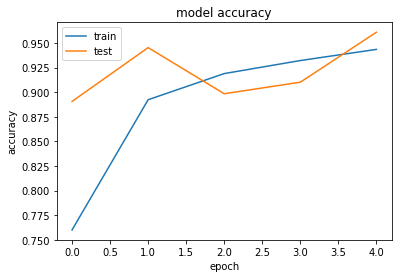

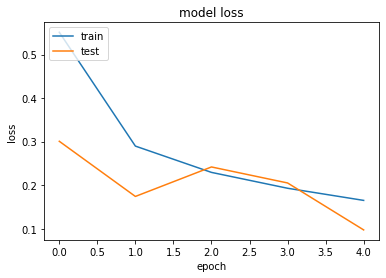

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)
 
# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path('footwear.tflite')
tflite_model_file.write_bytes(tflite_model)

3388344